<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/StatisticalInference/DistribucionBinomialWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Distribución Binomial en Inferencia Estadística**

En este cuaderno estudiaremos la **Distribución Binomial**, sus propiedades, visualizaciones y relaciones con otras distribuciones y teoremas relevantes.

Incluye extensiones hacia:
- **Distribución Multinomial**
- **Distribución Hipergeométrica**
- **Función Generadora de Momentos (MGF)**
- **Conexión Bayesiana con la Beta**


##**Distribución Binomial**

Una variable aleatoria $X$ tiene distribución binomial con parámetros $n$ y $p$ si:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k=0,1,\dots,n
$$

- $n$: número de ensayos
- $p$: probabilidad de éxito en cada ensayo
- $k$: número de éxitos observados

##**Propiedades**
- Valor esperado: $\mathbb{E}[X] = np$
- Varianza: $Var(X) = np(1-p)$


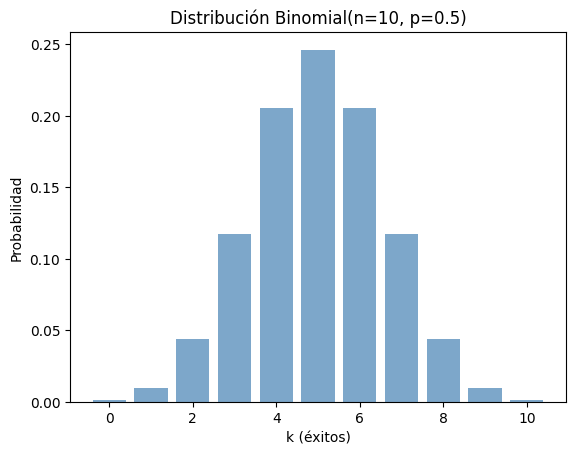

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, multinomial, hypergeom, poisson, norm, beta

def plotBinomial(n, p):
  xVals = np.arange(0, n+1)
  yVals = binom.pmf(xVals, n, p)
  plt.bar(xVals, yVals, color="steelblue", alpha=0.7)
  plt.title(f"Distribución Binomial(n={n}, p={p})")
  plt.xlabel("k (éxitos)")
  plt.ylabel("Probabilidad")
  plt.show()

plotBinomial(10, 0.5)


##**Función Generadora de Momentos (MGF)**

Para $X\sim Bin(n,p)$:

$$
M_X(t) = (1-p+pe^t)^n.
$$


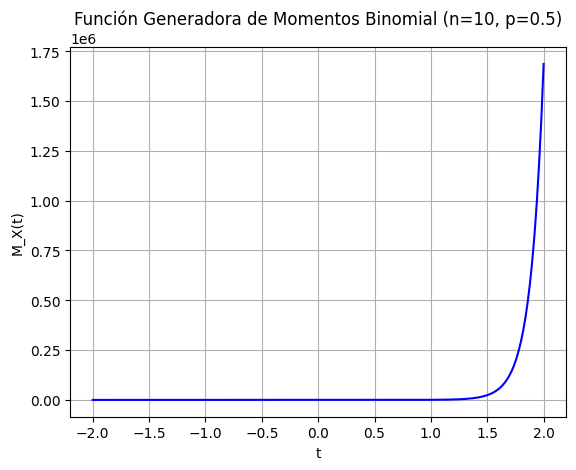

In [29]:
def mgfBinomial(t, n, p):
    return (1 - p + p*np.exp(t))**n

tVals = np.linspace(-2, 2, 200)
yVals = mgfBinomial(tVals, 10, 0.5)

plt.plot(tVals, yVals, 'b-')
plt.title("Función Generadora de Momentos Binomial (n=10, p=0.5)")
plt.xlabel("t")
plt.ylabel("M_X(t)")
plt.grid(True)
plt.show()


##**Relación con Otras Distribuciones**

###**1. Distribución Multinomial**

La Binomial es un caso particular de la **Multinomial** cuando hay solo dos categorías.

$$
P(X_1=x_1,\dots,X_k=x_k) = \frac{n!}{x_1!x_2!\dots x_k!}\prod_{i=1}^k p_i^{x_i},
$$

con $\sum x_i=n$ y $\sum p_i=1$.


Ejemplo de 5 simulaciones Multinomial (10 lanzamientos de un dado):
[[1 4 2 1 0 2]
 [0 0 4 2 3 1]
 [0 5 2 0 1 2]
 [1 1 2 2 1 3]
 [2 0 1 2 2 3]]


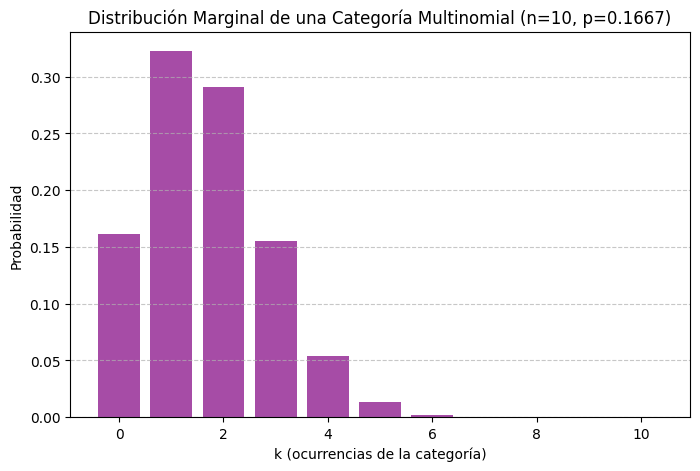

In [8]:
n = 10
pVals = [1/6]*6
sample = multinomial.rvs(n, pVals, size=5, random_state=42)
print("Ejemplo de 5 simulaciones Multinomial (10 lanzamientos de un dado):")
print(sample)

# Plotting the marginal distribution of X_1 (e.g., number of times the first category occurs)
# This is a Binomial distribution with parameters n and pVals[0]
x_binomial_vals = np.arange(0, n + 1)
y_binomial_vals = binom.pmf(x_binomial_vals, n, pVals[0])

plt.figure(figsize=(8, 5))
plt.bar(x_binomial_vals, y_binomial_vals, color="purple", alpha=0.7)
plt.title(f"Distribución Marginal de una Categoría Multinomial (n={n}, p={pVals[0]:.4f})")
plt.xlabel("k (ocurrencias de la categoría)")
plt.ylabel("Probabilidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **2. Distribución Hipergeométrica**

Mientras que la Binomial asume muestreo **con reemplazo**, la **Hipergeométrica** describe muestreo **sin reemplazo**.

$$
P(X=k) = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}
$$


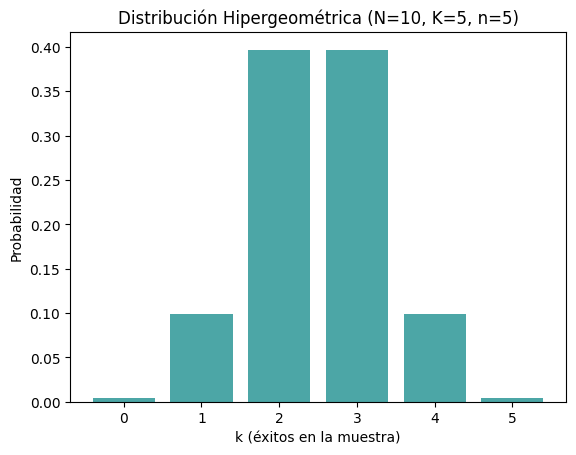

In [28]:
N, K, n = 10, 5, 5
xVals = np.arange(0, n+1)
yVals = hypergeom.pmf(xVals, N, K, n)

plt.bar(xVals, yVals, color="teal", alpha=0.7)
plt.title("Distribución Hipergeométrica (N=10, K=5, n=5)")
plt.xlabel("k (éxitos en la muestra)")
plt.ylabel("Probabilidad")
plt.show()


### **4. Conexión con la Distribución Beta (Bayesiana)**

La **Beta** es conjugada de la Binomial. Si $p\sim Beta(\alpha,\beta)$ y $X\sim Binomial(n,p)$, entonces el posterior es:

$$
p | X \sim Beta(\alpha + X,\, \beta + n - X).
$$


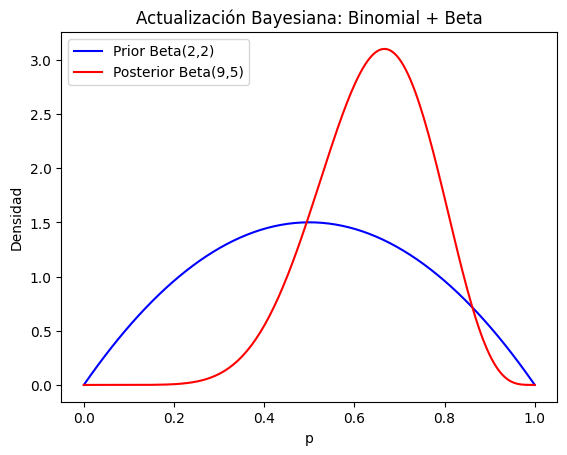

In [30]:
alpha, betaParam = 2, 2
X, n = 7, 10

posteriorAlpha = alpha + X
posteriorBeta = betaParam + n - X

pVals = np.linspace(0, 1, 200)
priorPdf = beta.pdf(pVals, alpha, betaParam)
posteriorPdf = beta.pdf(pVals, posteriorAlpha, posteriorBeta)

plt.plot(pVals, priorPdf, 'b-', label="Prior Beta(2,2)")
plt.plot(pVals, posteriorPdf, 'r-', label=f"Posterior Beta({posteriorAlpha},{posteriorBeta})")
plt.title("Actualización Bayesiana: Binomial + Beta")
plt.xlabel("p")
plt.ylabel("Densidad")
plt.legend()
plt.show()


## **Teorema del Límite Central (TLC)**

El TLC establece que la suma o promedio de un conjunto de variables independientes, bajo ciertas condiciones, tiende hacia una distribución normal, incluso si la variable individual tiene distribución binomial.



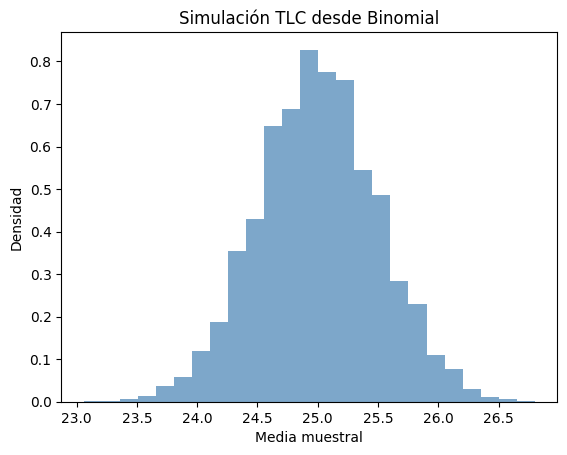

In [41]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
p = 0.5
num_muestras = 10000
muestras_promedio = []

for i in range(num_muestras):
    muestra = np.random.binomial(n=n, p=p, size=n)
    muestras_promedio.append(np.mean(muestra))

plt.hist(muestras_promedio, bins=25, color='steelblue', alpha=0.7, density=True)
plt.title('Simulación TLC desde Binomial')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.show()


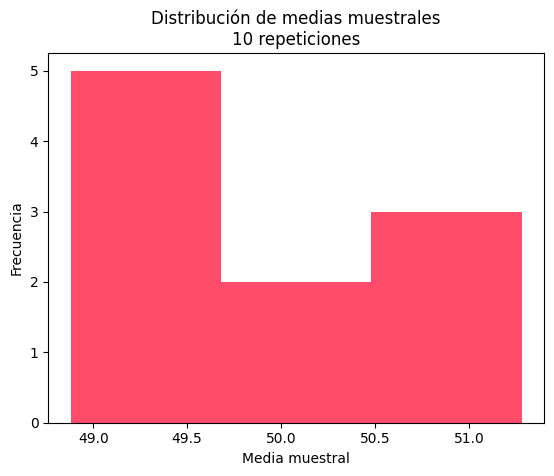

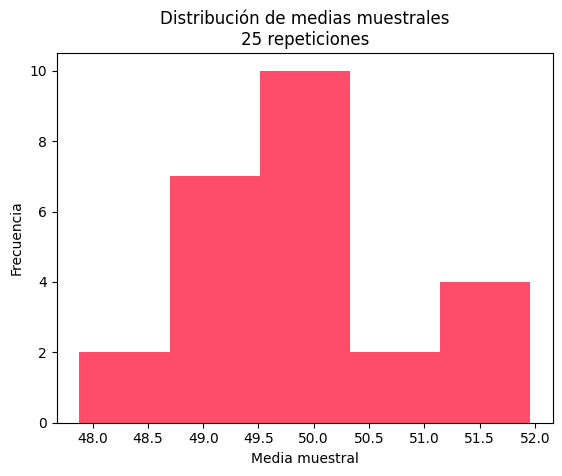

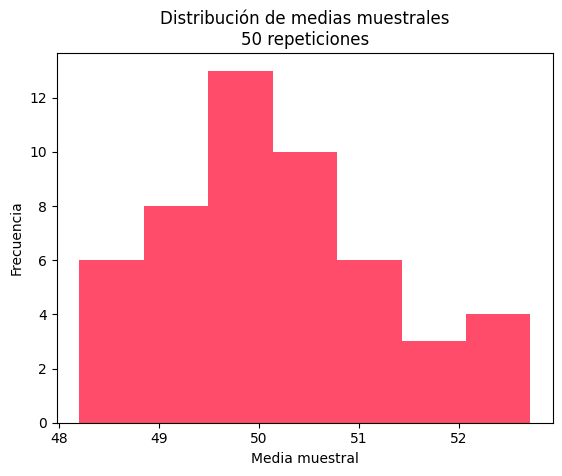

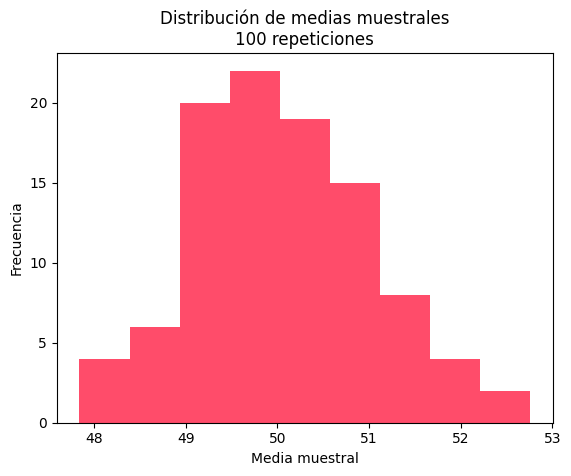

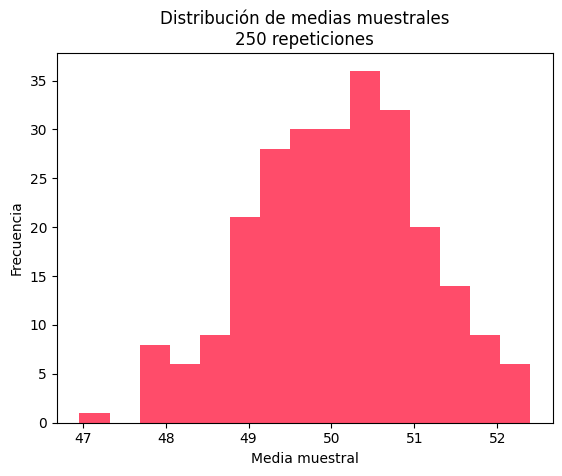

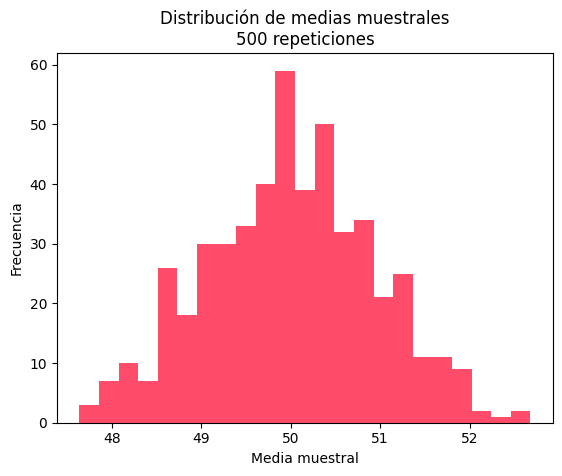

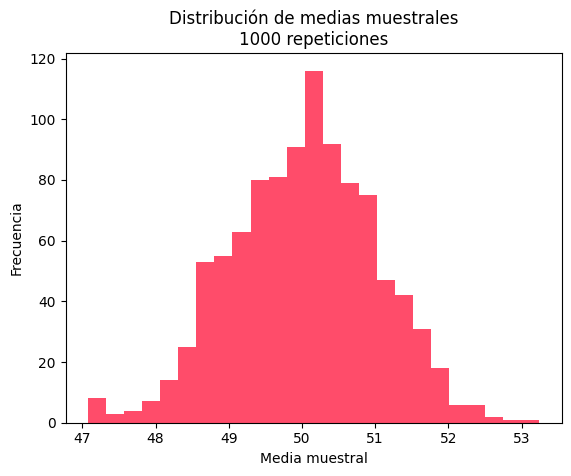

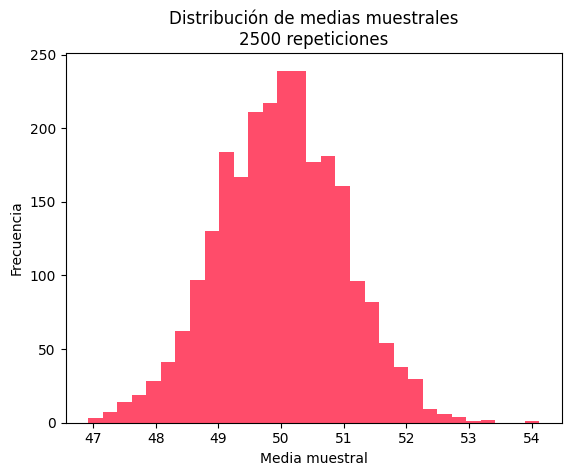

In [84]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Función para simular histogramas de medias muestrales binomiales
def simular_histogramas(n_reps, n_muestra, n_total, p):
    medias = []
    for _ in range(n_reps):
        muestra = np.random.binomial(n=n_total, p=p, size=n_muestra)
        medias.append(np.mean(muestra))
    return np.array(medias)

np.random.seed(123)
reps = [10, 25, 50, 100, 250, 500, 1000, 2500]
n_muestra = 25
n_total = 100
p = 0.5
# Bins ajustados según la lógica original del código
bins_counts = [3, 5, 7, 9, 15, 23, 25, 31]
color = (1,0,0.17)
for i, n_rep in enumerate(reps):
    medias = simular_histogramas(n_rep, n_muestra, n_total, p)

    plt.figure() # Crea una nueva figura para cada plot
    plt.hist(medias, bins=bins_counts[i], color=color, alpha=0.7)
    plt.title(f'Distribución de medias muestrales\n{n_rep} repeticiones')
    plt.xlabel('Media muestral')
    plt.ylabel('Frecuencia')
    filename = f'/content/histogram_reps_{n_rep}.png'
    plt.savefig(filename)
    plt.show()
    plt.close() # Cierra la figura para liberar memoria

##**Prueba de Intervalos de Confianza**

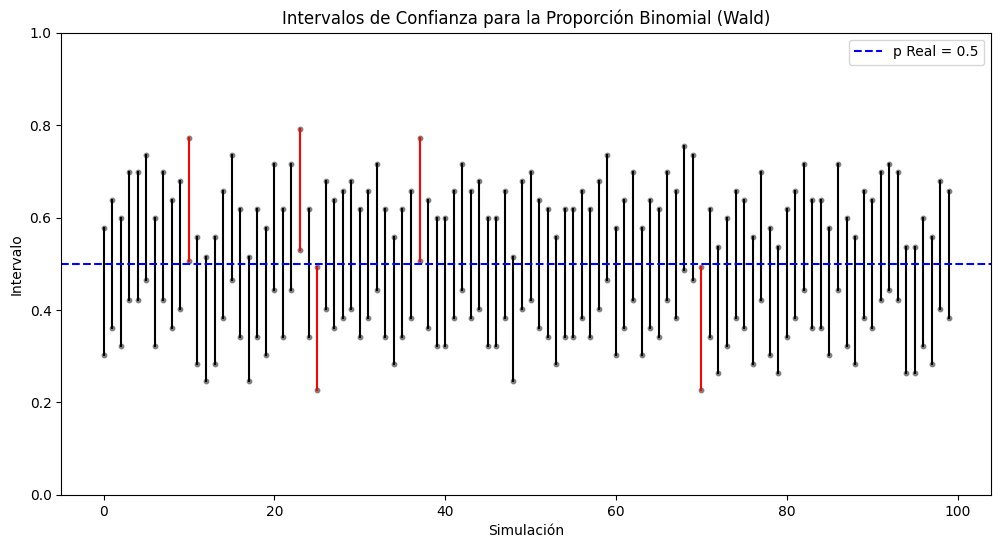

Proporción de intervalos que contienen la p real: 0.95


In [96]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def calcular_intervalo_binomial(n_trials_per_sample, alfa, p_real):
    zeta = norm.ppf(1 - alfa / 2)
    # Simula n_trials_per_sample ensayos de Bernoulli
    sample_bernoulli = np.random.binomial(n=1, p=p_real, size=n_trials_per_sample)
    p_hat = np.mean(sample_bernoulli) # Proporción muestral (estimación de p)

    # Calcula el error estándar usando p_hat (Intervalo de Wald)
    se = np.sqrt(p_hat * (1 - p_hat) / n_trials_per_sample)

    # Manejo de casos extremos donde p_hat es 0 o 1 (para evitar se=0)
    # Esto es una simplificación; métodos como Agresti-Coull son más robustos aquí.
    if se == 0:
        se = 1e-10 # Un valor pequeño para evitar división por cero en la gráfica

    error = zeta * se
    return (p_hat - error, p_hat + error)

np.random.seed(42)
n_trials_per_sample = 50 # Número de ensayos en cada muestra binomial
alpha = 0.05
num_simulaciones = 100
p_real = 0.5 # Valor teórico de p para la simulación

intervalos = [calcular_intervalo_binomial(n_trials_per_sample, alpha, p_real) for _ in range(num_simulaciones)]
contiene_p_real = [li <= p_real <= ls for (li, ls) in intervalos]

# Visualización de intervalos
plt.figure(figsize=(12, 6))
for i, (li, ls, contiene) in enumerate(zip(
    [iv[0] for iv in intervalos],
    [iv[1] for iv in intervalos],
    contiene_p_real
)):
    plt.plot([i, i], [li, ls], color='black' if contiene else 'red')
    plt.scatter([i], [li], color='gray', s=10)
    plt.scatter([i], [ls], color='gray', s=10)
plt.axhline(p_real, linestyle='--', color='blue', label=f'p Real = {p_real}')
plt.title('Intervalos de Confianza para la Proporción Binomial (Wald)')
plt.xlabel('Simulación')
plt.ylabel('Intervalo')
plt.ylim(0, 1) # Proporciones van de 0 a 1
plt.legend()
plt.show()

# Proporción de intervalos que contienen la p real
print(f'Proporción de intervalos que contienen la p real: {np.mean(contiene_p_real):.2f}')

##**Visualización de Múltiples Distribuciones Binomiales Normalizadas**

Intervalo de confianza (95%): (np.float64(0.3614096175650322), np.float64(0.6385903824349678))
p-valor: 1.0


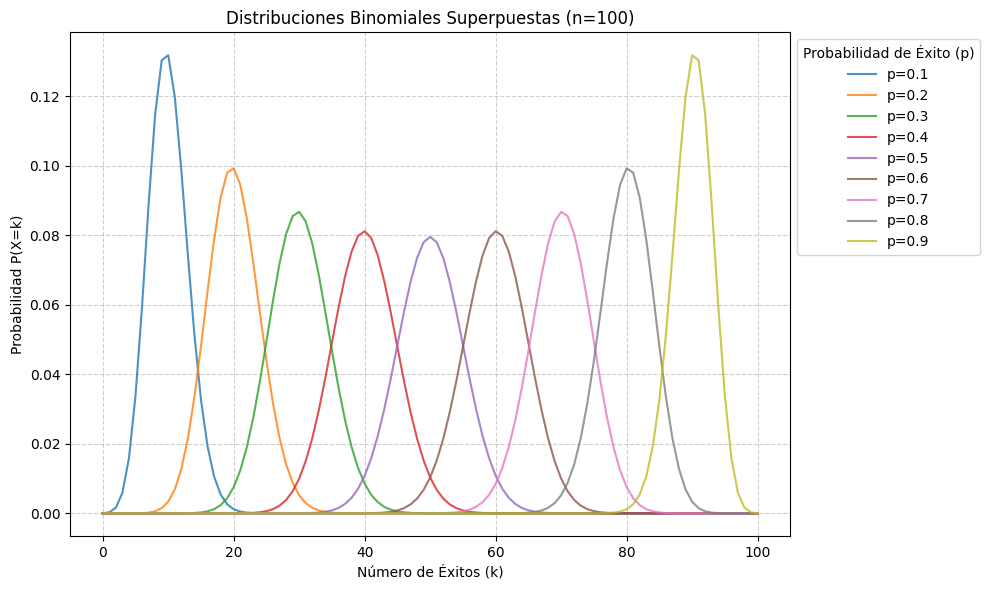

In [94]:
from scipy.stats import norm

n = 50
p0 = 0.5
alfa = 0.05
muestras = np.random.binomial(n=1, p=p0, size=n)
p_est = np.mean(muestras)
se = np.sqrt(p0 * (1-p0) / n)
z = norm.ppf(1 - alfa/2)
ic = (p_est - z * se, p_est + z * se)
print(f"Intervalo de confianza (95%): {ic}")

# Prueba de hipótesis para p = 0.5
z_obs = (p_est - p0) / se
p_value = 2 * (1 - norm.cdf(abs(z_obs)))
print(f"p-valor: {p_value}")

# --- Nueva sección para la gráfica de múltiples distribuciones binomiales ---

# Parámetros para la gráfica
n_trials = 100  # Suficiente número de ensayos para una curva suave
p_values = np.arange(0.1, 1.0, 0.1) # p de 0.1 a 0.9

x_values = np.arange(0, n_trials + 1) # Posibles número de éxitos (k)

plt.figure(figsize=(10, 6))

for p in p_values:
    pmf = binom.pmf(x_values, n_trials, p)
    plt.plot(x_values, pmf, label=f'p={p:.1f}', alpha=0.8)

plt.title('Distribuciones Binomiales Superpuestas (n=100)')
plt.xlabel('Número de Éxitos (k)')
plt.ylabel('Probabilidad P(X=k)')
plt.legend(title='Probabilidad de Éxito (p)', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Ajusta el diseño para que la leyenda no se superponga
plt.show()